In [1]:
!nvidia-smi

Sat Jun 19 12:25:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing the Libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Dataset

In [4]:
Train_Datagen = ImageDataGenerator(rescale= 1/255, shear_range=0.2, zoom_range= 0.2, horizontal_flip= True)
Training_set = Train_Datagen.flow_from_directory('/content/drive/MyDrive/Cat vs Dog/train', target_size=(64, 64), batch_size=64, class_mode='categorical')

Found 8010 images belonging to 2 classes.


In [5]:
Test_Datagen = ImageDataGenerator(rescale= 1/255)
Test_set = Test_Datagen.flow_from_directory('/content/drive/MyDrive/Cat vs Dog/test', target_size=(64, 64), batch_size=64, class_mode='categorical')

Found 1000 images belonging to 2 classes.


# Building the Model

In [6]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [7]:
model=Sequential()

## Layer - 1

In [8]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

## Layer - 2

In [9]:
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

##  Layer -3 

In [10]:
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.4))

## Flattening

In [11]:
model.add(Flatten())

## Full - Connection

In [12]:
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [13]:
model.add(Dense(units=2, activation='softmax'))

## History - Data

In [14]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history=model.fit(Training_set, validation_data=Test_set, steps_per_epoch=len(Training_set), validation_steps=len(Test_set), epochs=25)

Epoch 1/25
126/126 [==============================] - 2099s 16s/step - loss: 1.1002 - accuracy: 0.5613 - val_loss: 1.3919 - val_accuracy: 0.5000
Epoch 2/25
126/126 [==============================] - 36s 289ms/step - loss: 0.7294 - accuracy: 0.6396 - val_loss: 1.4781 - val_accuracy: 0.5000
Epoch 3/25
126/126 [==============================] - 36s 289ms/step - loss: 0.5875 - accuracy: 0.7000 - val_loss: 1.0008 - val_accuracy: 0.5270
Epoch 4/25
126/126 [==============================] - 36s 288ms/step - loss: 0.5442 - accuracy: 0.7310 - val_loss: 0.5636 - val_accuracy: 0.6940
Epoch 5/25
126/126 [==============================] - 37s 291ms/step - loss: 0.5152 - accuracy: 0.7454 - val_loss: 0.6022 - val_accuracy: 0.6920
Epoch 6/25
126/126 [==============================] - 36s 289ms/step - loss: 0.4978 - accuracy: 0.7568 - val_loss: 0.5929 - val_accuracy: 0.6880
Epoch 7/25
126/126 [==============================] - 36s 286ms/step - loss: 0.4676 - accuracy: 0.7748 - val_loss: 0.5630 - val_ac

In [18]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Cat vs Dog/Cat_Dog_Model.h5')

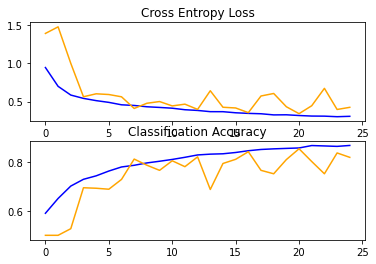

In [19]:
summarize_diagnostics(history)

# Predictions

In [20]:
print(Training_set.class_indices)

{'cat': 0, 'dog': 1}
